In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
df = pd.read_csv('sms_spam.csv', encoding='ISO-8859-1')

In [4]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
# Data cleaning
# EDA
# Text preproccessing
# Model Building
# Evalutation
# Improvements
# Website
# Deployment

# Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
 # drop cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
df.sample(4)

,v1,v2
2008,ham,See the forwarding message for proof
1946,ham,Hey we can go jazz power yoga hip hop kb and y...
4044,ham,If You mean the website. Yes.
4588,ham,Have you not finished work yet or something?


In [11]:
# rename the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [12]:
df.sample(5)

,target,text
448,ham,LOL ... Have you made plans for new years?
3450,ham,Yes we were outside for like 2 hours. And I ca...
2592,ham,My friend just got here and says he's upping h...
3323,ham,I don wake since. I checked that stuff and saw...
2279,ham,"Sorry, I'll call later in meeting"


In [13]:
# labeling target
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
df['target'] = le.fit_transform(df['target']) 
# ham = 0
# spam = 1

In [15]:
df.isna().sum() #missing values check

target    0
text      0
dtype: int64

In [16]:
df.duplicated().sum()

403

In [17]:
# drop duplicate rows
df.drop_duplicates(keep='first',inplace=True)

In [18]:
df.shape

(5169, 2)

In [19]:
df.duplicated().sum()

0

# EDA

In [21]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

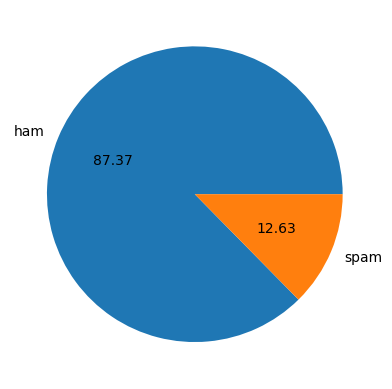

In [22]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

- data is imbalanced

In [24]:
import nltk

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### creating 3 new feature :
- length of text
- num of words
- num of sentances

In [27]:
df['num_chars'] = df['text'].apply(len)

In [28]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [29]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [30]:
df[['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# ham messages
df[df['target'] == 0][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# spam messages
df[df['target'] == 1][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


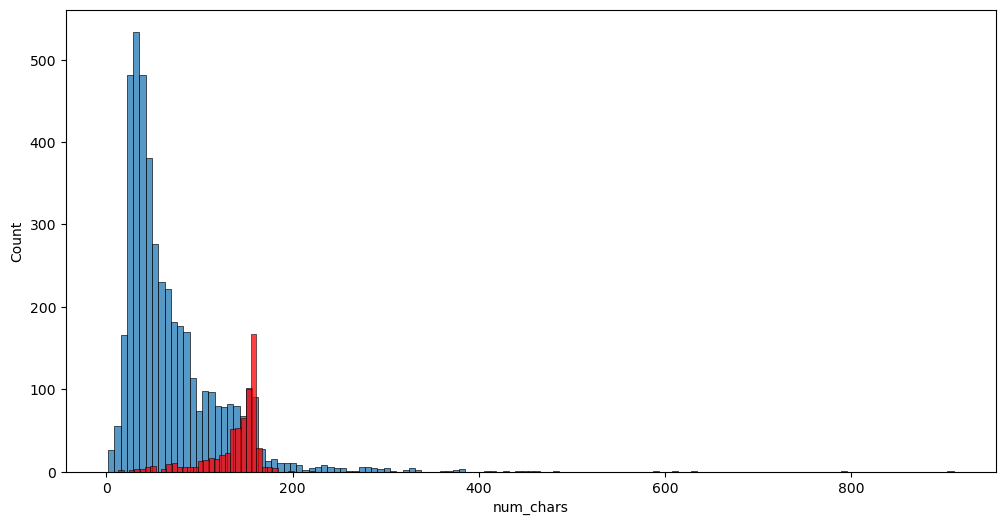

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_chars'])
sns.histplot(df[df['target'] == 1]['num_chars'],color='red')
plt.show()

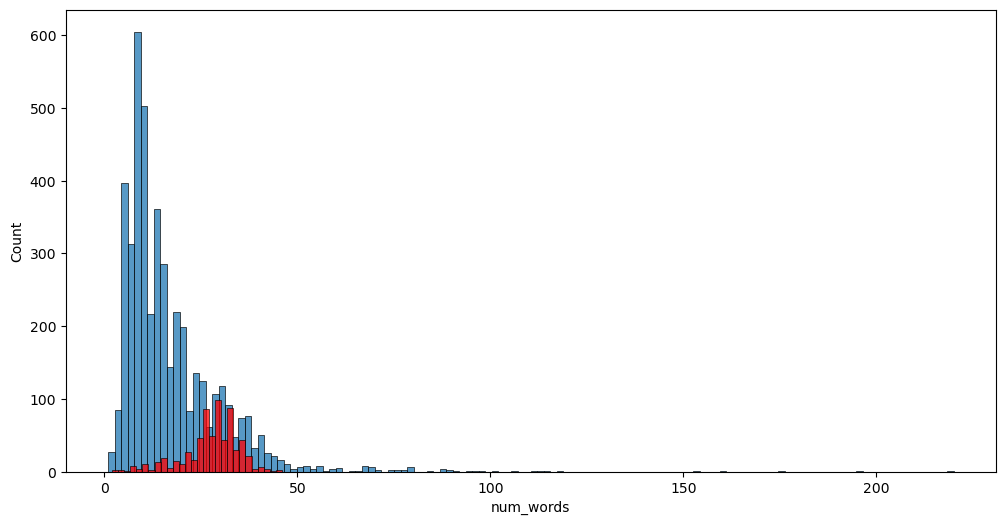

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')
plt.show()

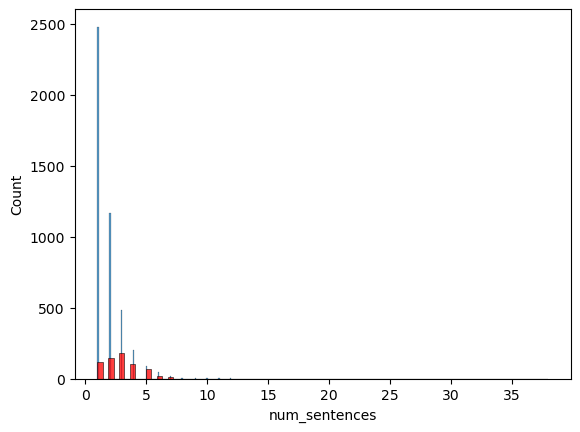

In [35]:
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red')
plt.show()

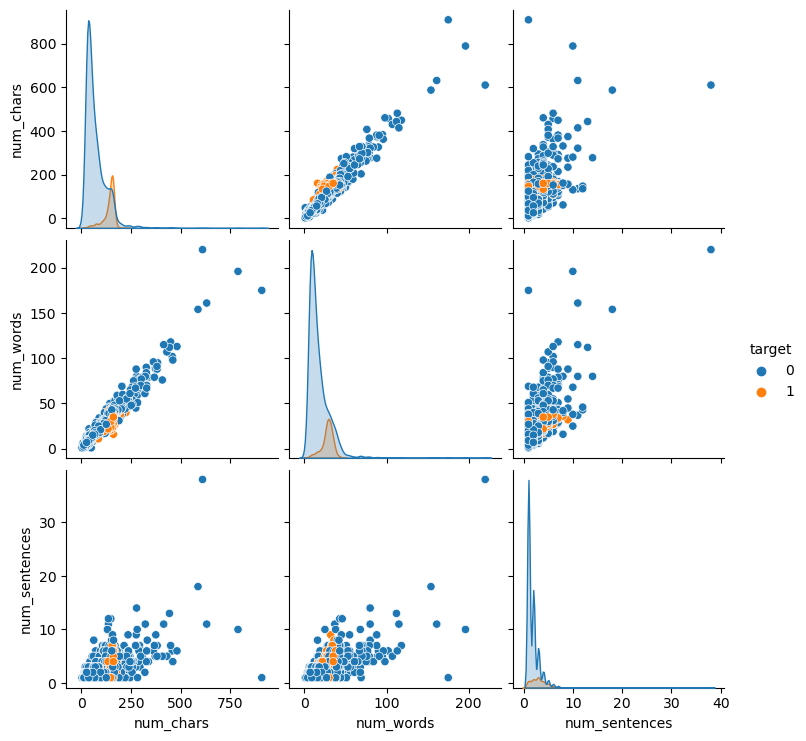

In [36]:
sns.pairplot(df,hue='target')

In [37]:
df.corr(numeric_only=True)

,target,num_chars,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_chars,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

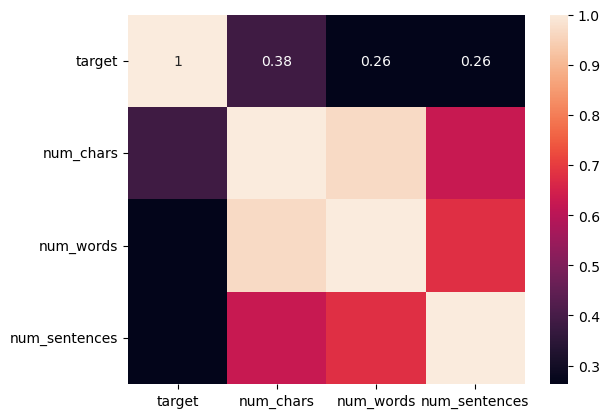

In [38]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Data Preprocessing
- lower case
- tokenization
- remove special chars
- remove stop words
- stemming

In [40]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [41]:
ps = PorterStemmer()

In [42]:
def transform_text(text):
    text = text.lower()

    text = nltk.word_tokenize(text) # tokenizer will separate each words

    y = []
    for i in text: # removing special chars
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()

    for i in text: # removing stop words and punctuation marks
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [43]:
transform_text('Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx')

'okay name ur price long legal wen pick u ave x am xx'

In [44]:
df['text'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [45]:
df['transformed_text'] = df['text'].apply(transform_text)

In [46]:
df

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [47]:
!pip install wordcloud

In [48]:
# word cloud of spam messages
from wordcloud import WordCloud

In [49]:
wc = WordCloud(height=500,width=500,background_color='white',min_font_size=10)

In [50]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=' '))

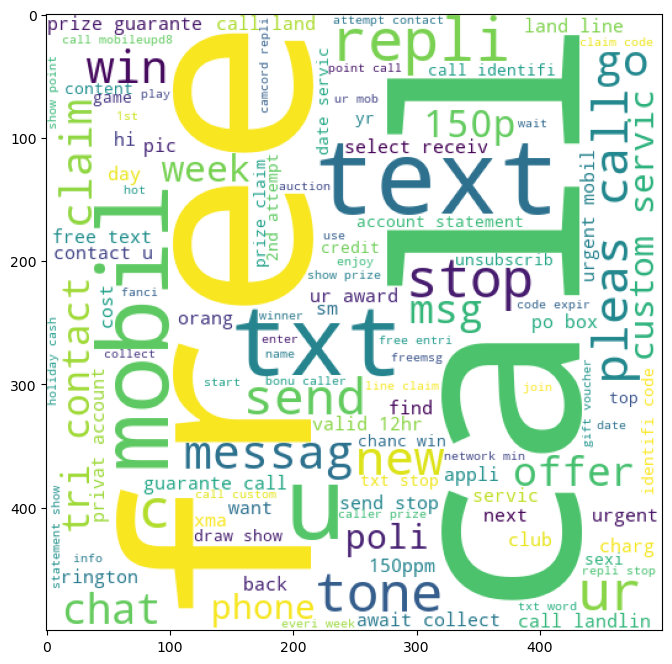

In [51]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)
plt.show()

In [52]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=' '))

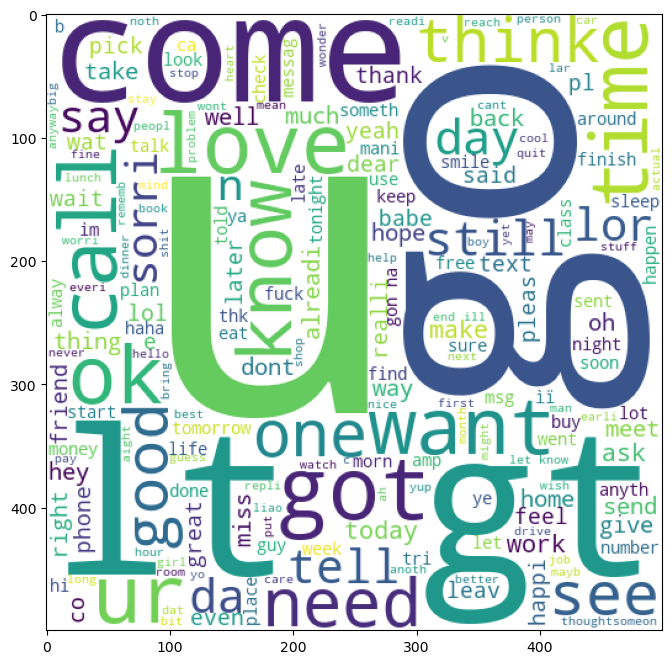

In [53]:
plt.figure(figsize=(15,8))
plt.imshow(ham_wc)
plt.show()

In [54]:
## finding top 30 words from spam msg
spam_corpus = []

for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [55]:
len(spam_corpus)

9939

In [56]:
from collections import Counter

In [57]:
pd.DataFrame(Counter(spam_corpus).most_common(30))[0]

0        call
1        free
2           2
3         txt
4        text
5           u
6          ur
7       mobil
8        stop
9       repli
10      claim
11          4
12      prize
13        get
14        new
15     servic
16       tone
17       send
18     urgent
19      nokia
20    contact
21      award
22      phone
23       cash
24      pleas
25       week
26        win
27          c
28    collect
29        min
Name: 0, dtype: object

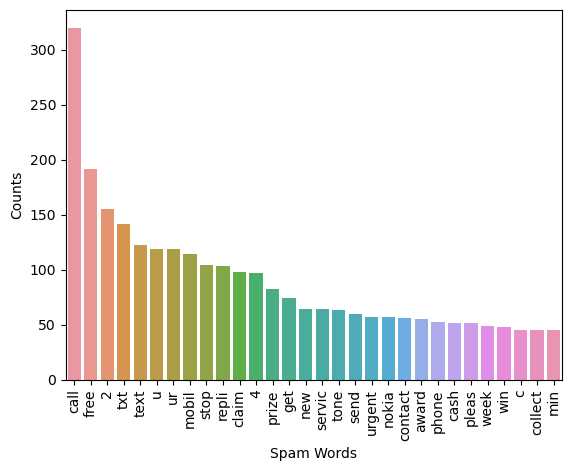

In [58]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.xlabel('Spam Words')
plt.ylabel('Counts')
plt.show()

In [59]:
## finding top 30 words from ham msg
ham_corpus = []

for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [60]:
len(ham_corpus)

35404

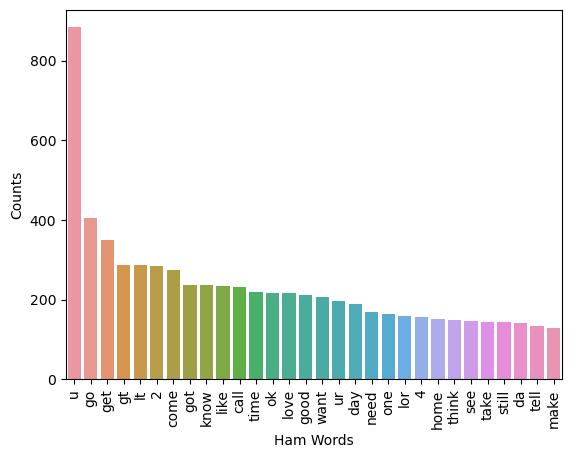

In [61]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.xlabel('Ham Words')
plt.ylabel('Counts')
plt.show()

# Model Building

In [63]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [64]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [65]:
X.shape

(5169, 3000)

In [66]:
 y = df['target'].values

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.2)

In [68]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [69]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [70]:
gnb.fit(X_train,y_train)

GaussianNB()

In [71]:
y_pred1 = gnb.predict(X_test)

In [72]:
print('Gaussian',accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

Gaussian 0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [73]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [74]:
y_pred2 = mnb.predict(X_test)

In [75]:
print('Multinomial',accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

Multinomial 0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [76]:
bnb.fit(X_train,y_train)

BernoulliNB()

In [77]:
y_pred3 = bnb.predict(X_test)

In [78]:
print('Bernaulli',accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

Bernaulli 0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [79]:
## tfidf -- mnb

In [80]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))